In [476]:
# Het importeren van de nodige libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

Het inladen van de CSV

In [477]:
data = pd.read_csv('taylor_swift_spotify.csv')
raw_data = pd.read_csv('taylor_swift_spotify.csv')
data.head(2)

,ID,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Lavender Haze,Midnights (3am Edition),2022-10-22,1,4g2c7NoTWAOSYDy44l9nub,spotify:track:4g2c7NoTWAOSYDy44l9nub,0.2040,0.735,0.444,0.0012,0.1700,-10.519,0.0684,97.038,0.0984,87,202395
1,1,Maroon,Midnights (3am Edition),2022-10-22,2,199E1RRrVmVTQqBXih5qRC,spotify:track:199E1RRrVmVTQqBXih5qRC,0.0593,0.658,0.378,0.0000,0.0976,-8.300,0.0379,108.034,0.0382,87,218270


Wat voor data hebben we mee te maken?

In [478]:
data.dtypes

ID                    int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

De id, uri en name zeggen niets over populariteit (tenminste niets bruikbaars)

In [479]:
data = data.drop(columns=['id', 'uri', 'name']) # onbruikbare data verwijderen

all_albums = data['album'].unique()
dic = dict((v,k) for k,v in enumerate(all_albums))

data['album'] = data['album'].map(dic) # album omzetten naar int
missing_values = data.isnull().sum()

# Geef alle data types weer
data_types = data.dtypes

# check of er missende waarden zijn
missing_values, data_types
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print(missing_data)

Series([], dtype: int64)


Er is geen missende data in de dataset, dat scheelt!

Hoe ziet populariteit er uit?

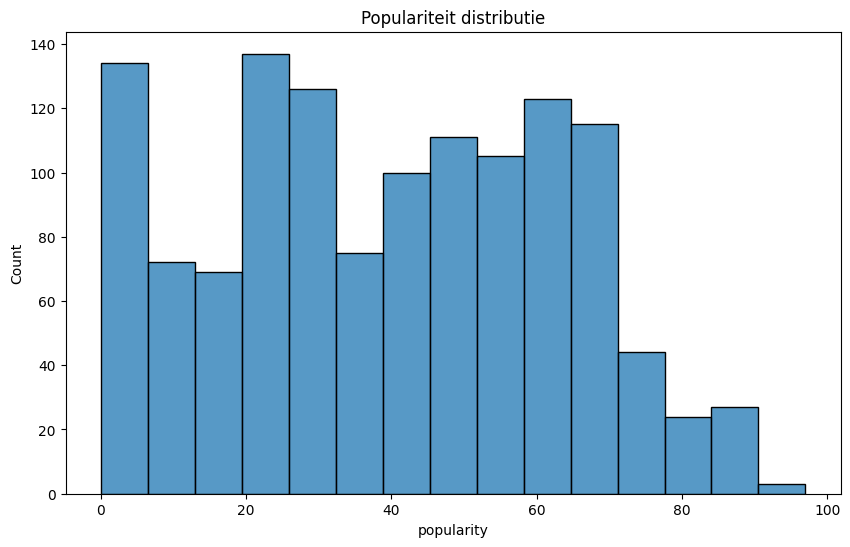

In [480]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins='auto')
plt.title('Populariteit distributie')
plt.show()

Opmerkelijk hier is dat er heel veel lage popularity nummers zijn

Bijgewerkte datatypes:

In [481]:
# Zet de release date om naar datetime
data['release_date'] = pd.to_datetime(data['release_date'])

data.dtypes

ID                           int64
album                        int64
release_date        datetime64[ns]
track_number                 int64
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object

We willen de correlaties graag inzichtelijk maken...

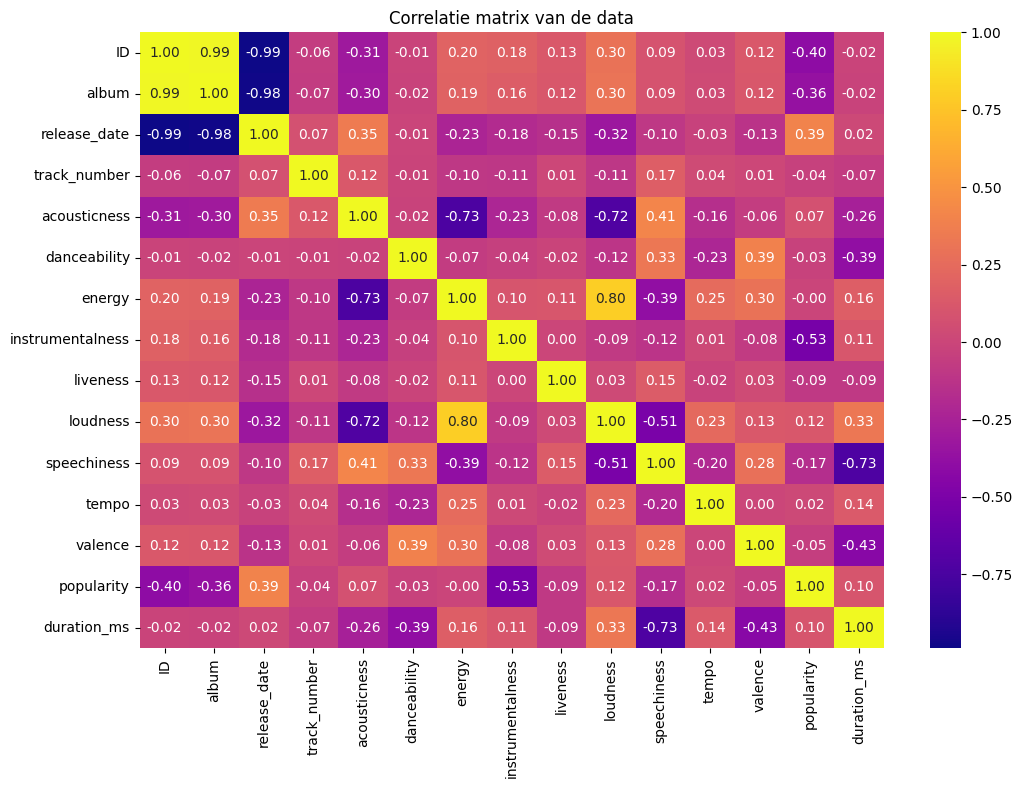

In [482]:
# maak een correlatie matrix
correlation_matrix = data.corr()

# Plot dit naar een heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma')
plt.title('Correlatie matrix van de data')
plt.show()

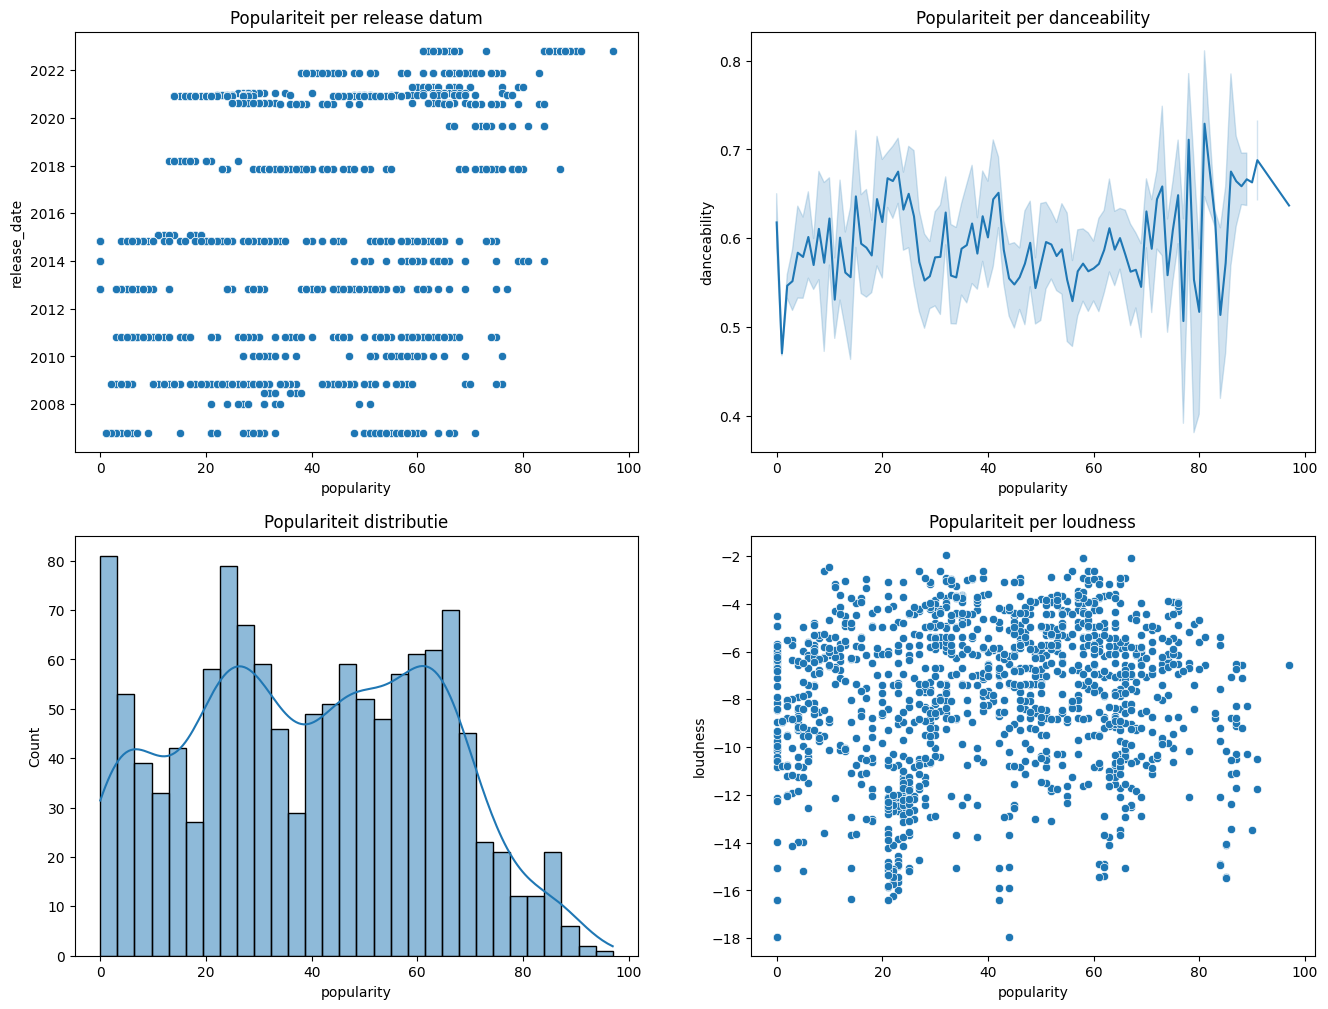

In [483]:
#het plotten van verschillende grafieken
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x='popularity', y='release_date', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Populariteit per release datum')
data_sorted = data.sort_values('release_date')
sns.lineplot(data=data_sorted, x='popularity', y='danceability', ax=axes[0, 1])
axes[0, 1].set_title('Populariteit per danceability')
sns.histplot(data['popularity'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Populariteit distributie')
sns.scatterplot(x='popularity', y='loudness', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Populariteit per loudness')
plt.show()



Er zijn veel albums met het woord karaoke erin. Deze hebben geen vocals waardoor de instrumentaliteit erg hoog zal zijn en de speechiness erg laag. Dit veranderd de data te veel.

In [484]:
data_without_karaoke = data.drop(data[raw_data['album'].str.contains("Karaoke")].index)
data_without_karaoke.head(2)

print(data_without_karaoke.count())

ID                  1075
album               1075
release_date        1075
track_number        1075
acousticness        1075
danceability        1075
energy              1075
instrumentalness    1075
liveness            1075
loudness            1075
speechiness         1075
tempo               1075
valence             1075
popularity          1075
duration_ms         1075
dtype: int64


Het verschil tussen het weglaten van karaoke nummers:

Text(0.5, 1.0, 'Popularity vs. Instrumentalness')

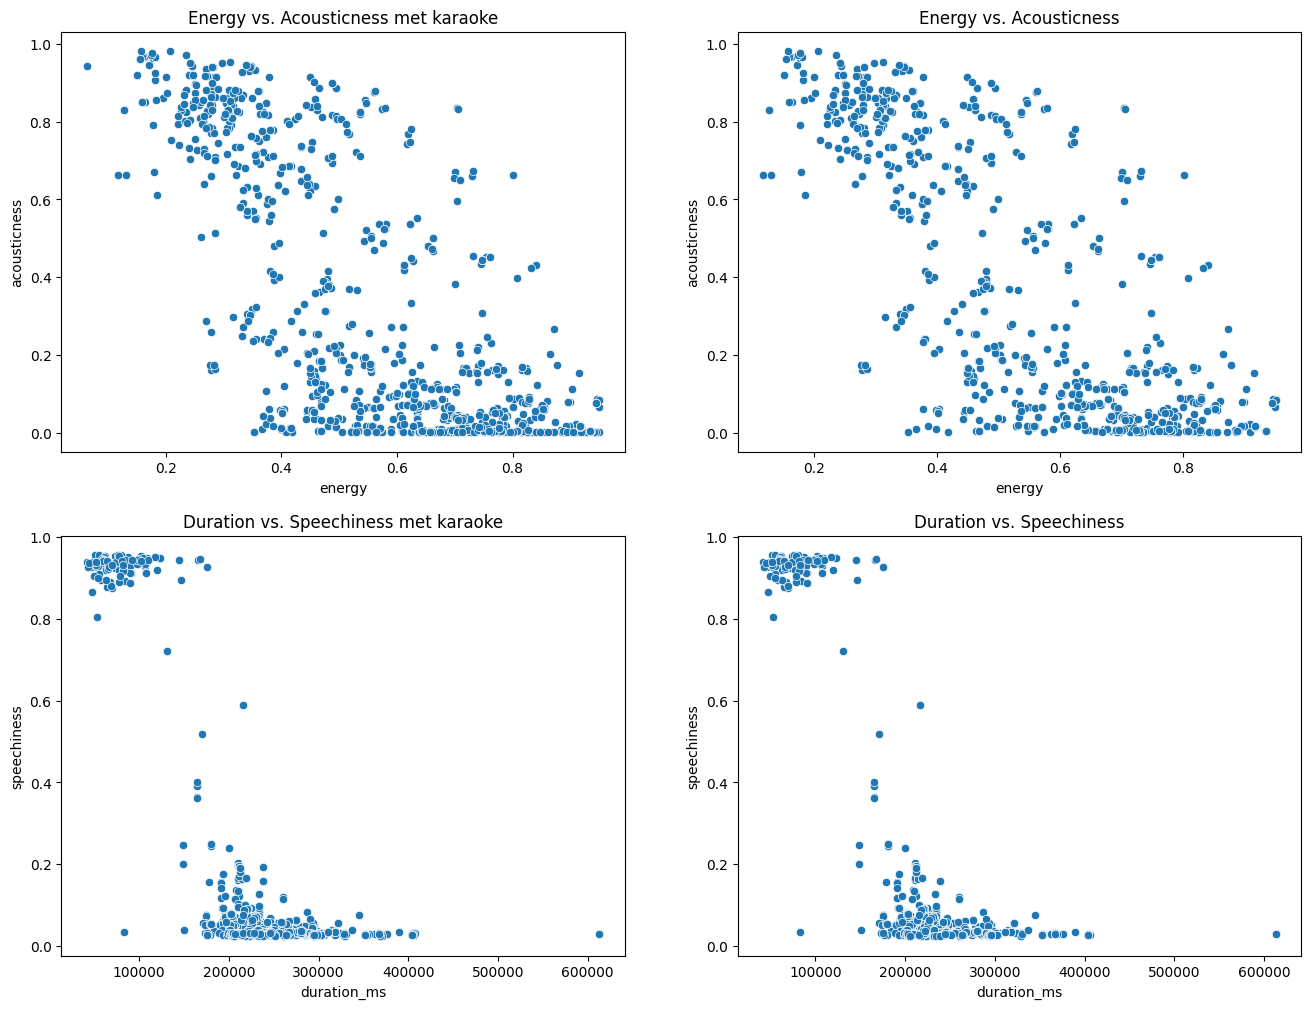

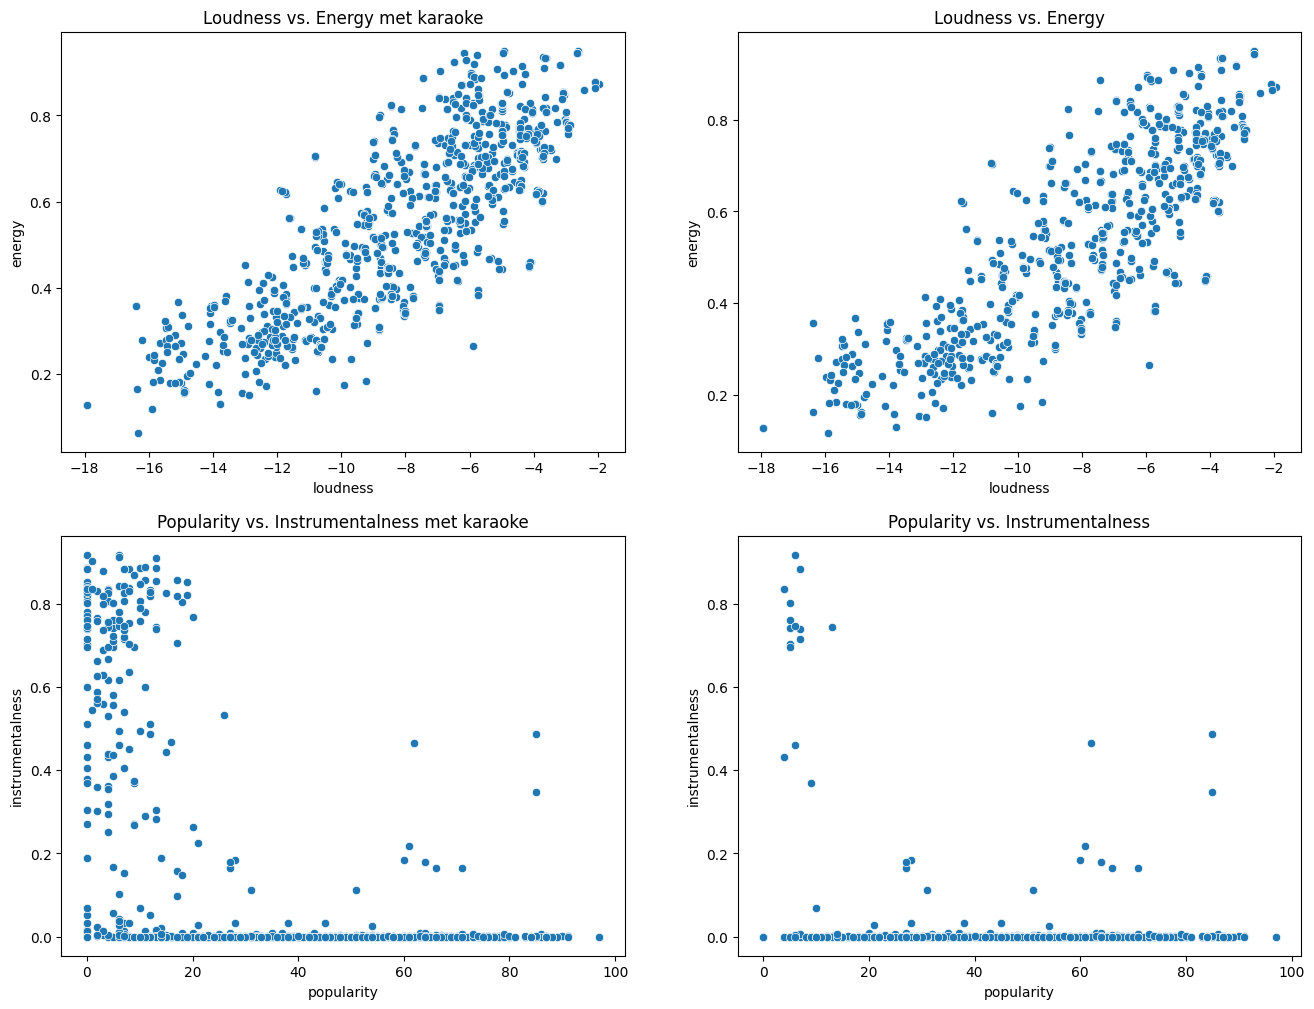

In [485]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=data, x='energy', y='acousticness', ax=axes[0, 0])
axes[0, 0].set_title('Energy vs. Acousticness met karaoke')
sns.scatterplot(data=data_without_karaoke, x='energy', y='acousticness', ax=axes[0, 1])
axes[0, 1].set_title('Energy vs. Acousticness')



sns.scatterplot(data=data, x='duration_ms', y='speechiness', ax=axes[1, 0])
axes[1, 0].set_title('Duration vs. Speechiness met karaoke')
sns.scatterplot(data=data_without_karaoke, x='duration_ms', y='speechiness', ax=axes[1, 1])
axes[1, 1].set_title('Duration vs. Speechiness')



fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=data, x='loudness', y='energy', ax=axes[0, 0])
axes[0, 0].set_title('Loudness vs. Energy met karaoke')
sns.scatterplot(data=data_without_karaoke, x='loudness', y='energy', ax=axes[0, 1])
axes[0, 1].set_title('Loudness vs. Energy')

sns.scatterplot(data=data, x='popularity', y='instrumentalness', ax=axes[1, 0])
axes[1, 0].set_title('Popularity vs. Instrumentalness met karaoke')
sns.scatterplot(data=data_without_karaoke, x='popularity', y='instrumentalness', ax=axes[1, 1])
axes[1, 1].set_title('Popularity vs. Instrumentalness')

    

Vergelijken van de correlatie matrixen tussen de met en zonder karaoke versies.

Text(0.5, 1.0, 'Correlatie matrix zonder karaoke')

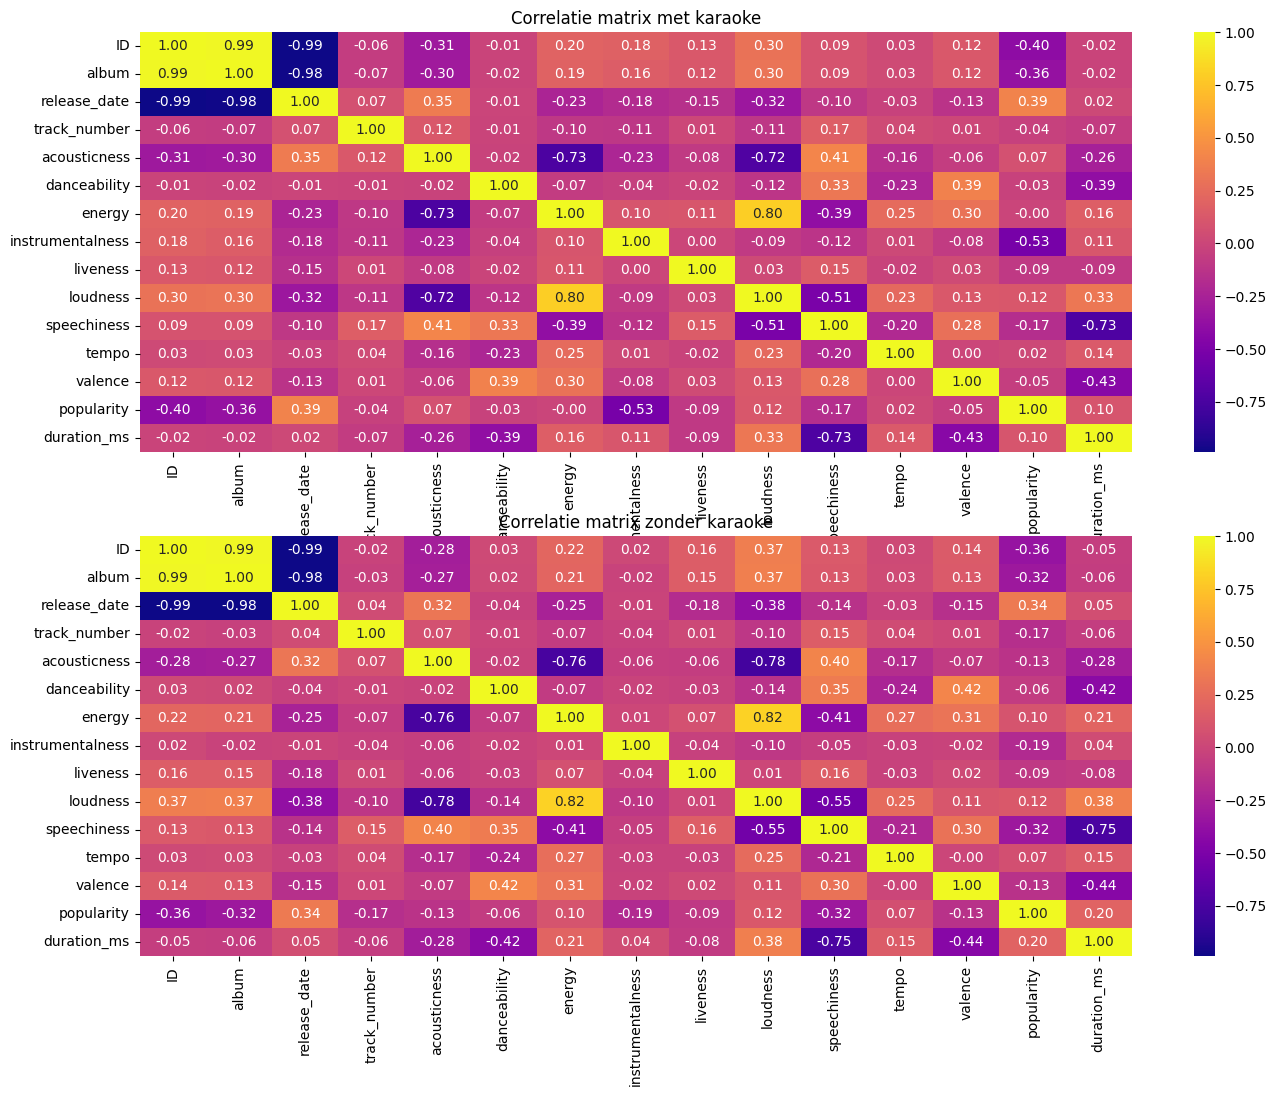

<Figure size 1200x800 with 0 Axes>

In [486]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))


correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma', ax=axes[0])
axes[0].set_title('Correlatie matrix met karaoke')


correlation_matrix = data_without_karaoke.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma', ax=axes[1])
axes[1].set_title('Correlatie matrix zonder karaoke')

Een duidelijk verschil. Vooral de populariteit lijkt meer op een normaalverdeling nu:

Text(0.5, 1.0, 'Popularity Distributie (zonder Karaoke)')

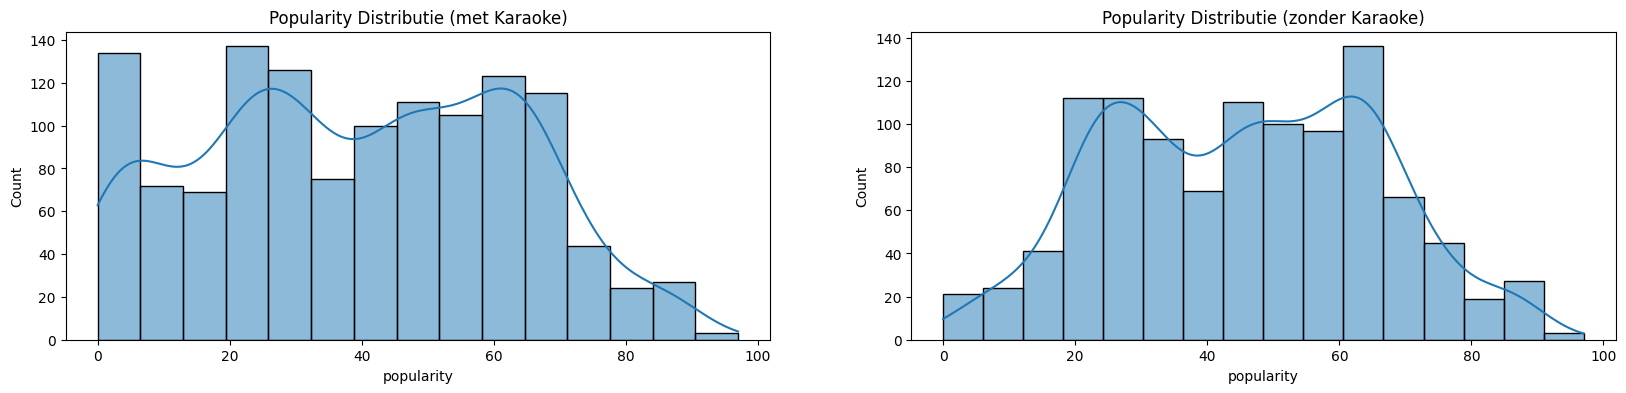

In [487]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))


sns.histplot(data['popularity'], bins='auto', kde=True, ax=axes[0])
axes[0].set_title('Popularity Distributie (met Karaoke)')

sns.histplot(data_without_karaoke['popularity'], bins='auto', kde=True, ax=axes[1])
axes[1].set_title('Popularity Distributie (zonder Karaoke)')

De karaoke albums zijn natuurlijk instrumentaal waardoor ze weinig kunnen zeggen over de populariteit van een nummer met metrieken als speechiness. Die zullen namelijk 0 zijn bij karaoke. Daarom hebben we deze waarden verwijderd. 

Hoe zit dat met datetime, wat is de verdeling?:

Text(0.5, 1.0, 'Day Distribution')

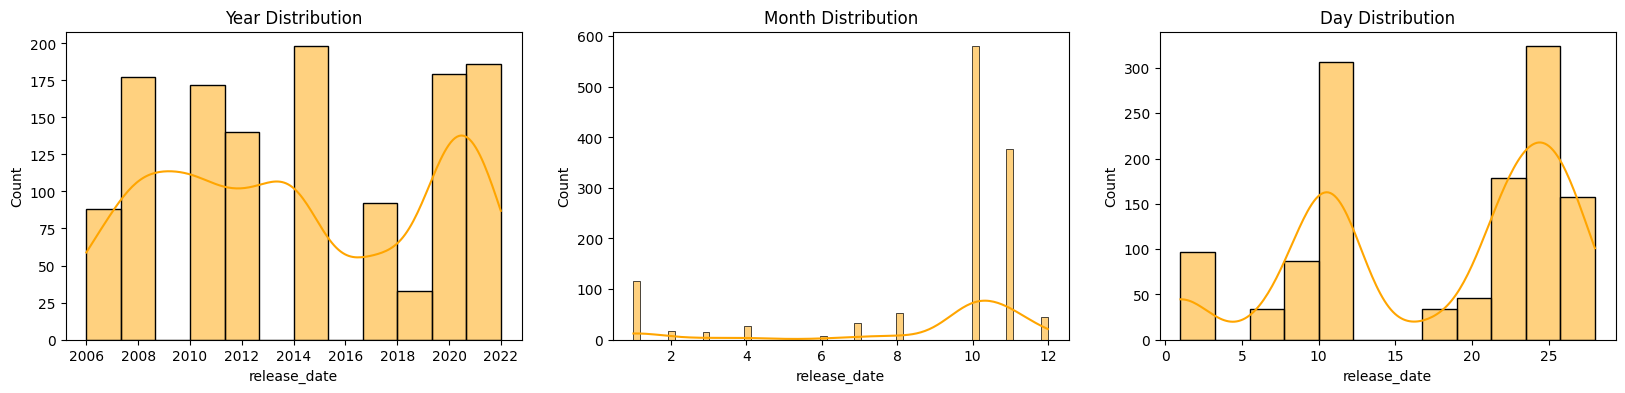

In [488]:
data['release_date'] = pd.to_datetime(data['release_date'])

release_year = data['release_date'].dt.year
release_month = data['release_date'].dt.month
release_day = data['release_date'].dt.day

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

sns.histplot(release_year, bins='auto', kde=True, ax=axes[0], color='orange')
axes[0].set_title('Year Distribution')
sns.histplot(release_month, bins='auto', kde=True, ax=axes[1], color='orange')
axes[1].set_title('Month Distribution')
sns.histplot(release_day, bins='auto', kde=True, ax=axes[2], color='orange')
axes[2].set_title('Day Distribution')



Interessant om hier te zien dat Taylor vaak nummers uit brengt rond 25 oktober.

Trainen!

Eerst even een aparte dataframe zodat we deze in de train_test_split kunnen gebruiken

In [489]:
df = pd.DataFrame({
    'year': release_year,
    'month': release_month,
    'day': release_day,
    'album': data['album'],
    'track_number' : data['track_number'],
    'acousticness' : data['acousticness'],
    'danceability' : data['danceability'],
    'energy' : data['energy'],
    'instumentalness' : data['instrumentalness'],
    'liveness' : data['liveness'],
    'loudness' : data['loudness'],
    'speechiness' : data['speechiness'],
    'tempo' : data['tempo'],
    'valence' : data['valence'],
    'duration_ms' : data['duration_ms'],
})

In [490]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df, data['popularity'], test_size=0.1, random_state=31)

In [491]:
print(f"X shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X shape: (1138, 15)
X test shape: (127, 15)
y shape: (1138,)
y test shape: (127,)


Lineare regressie testen

In [492]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
linear_regression = LinearRegression()

# het model trainnen
linear_regression.fit(X_train_scaled, y_train)

# maak een voorspelling op basis van de test data
y_pred = linear_regression.predict(X_test_scaled)

# Bereken de mean squared error en de r2 score voor het eindresultaat
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(324.54860459085006, 0.4289853374586823)

We komen niet heel veel ver hiermee, "maar" 43% correct, dit kan vast hoger.

In [493]:
from sklearn.linear_model import SGDRegressor

# maak een SGD regressor aan
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)

# het model trainnen
sgd_regressor.fit(X_train_scaled, y_train)

# maak een voorspelling op basis van de test data
y_pred_sgd = sgd_regressor.predict(X_test_scaled)

# Bereken de mean squared error en de r2 score voor het eindresultaat
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

mse_sgd, r2_sgd

(334.6561984338845, 0.41120191702259357)

Nog slechter zelfs :( 41%

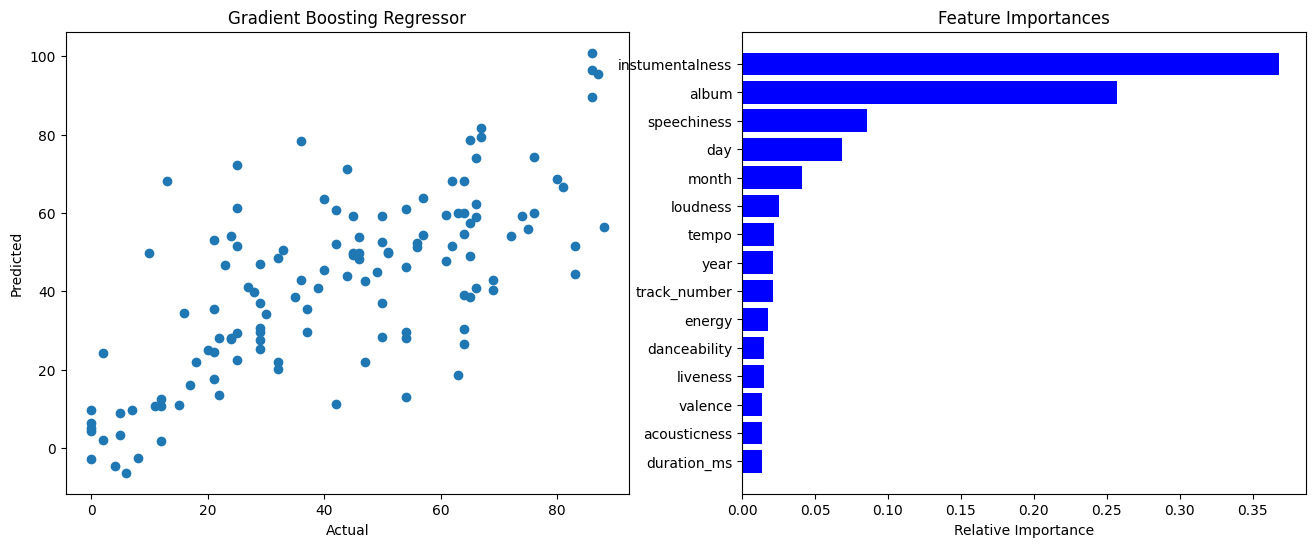

mean_squared_error: 308.83896808243964
r^2 score: 0.45662505817418364


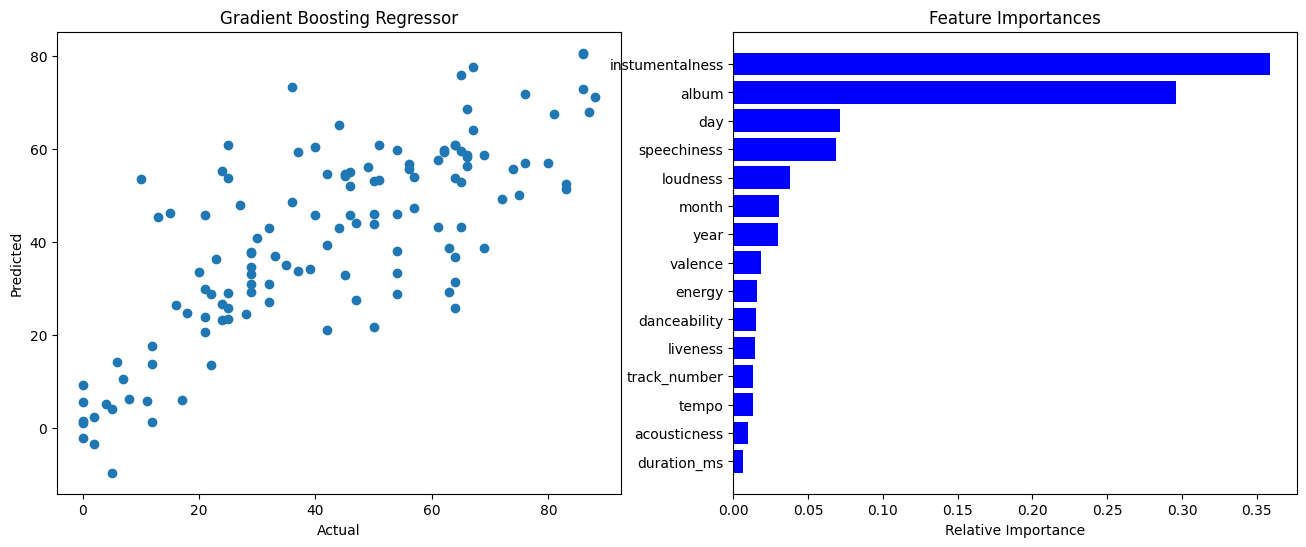

mean_squared_error: 235.8770974734102
r^2 score: 0.5849950383092725


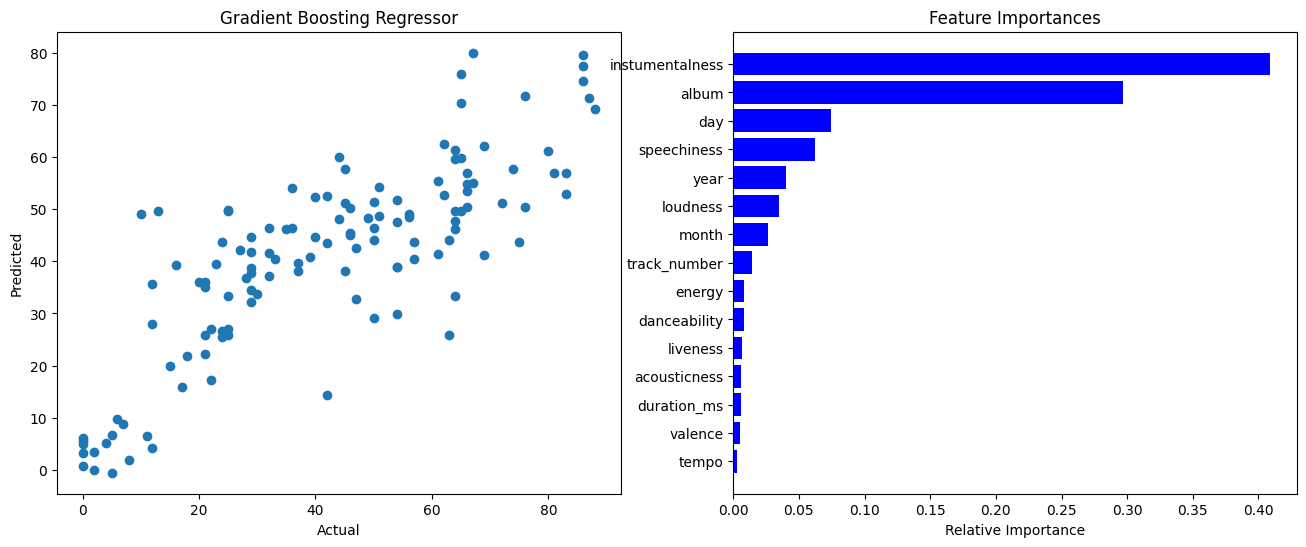

mean_squared_error: 196.5224746433775
r^2 score: 0.6542360282776685


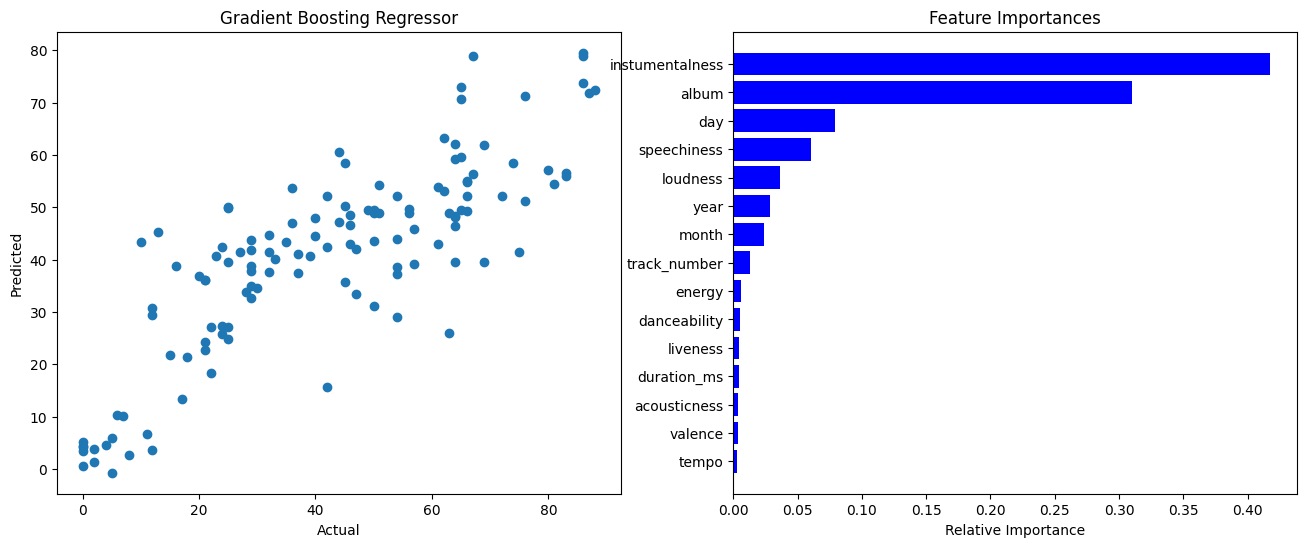

mean_squared_error: 186.5743839267102
r^2 score: 0.6717388170222678


In [515]:
from sklearn.ensemble import GradientBoostingRegressor

def grad_boost(n_estimators, learning_rate, max_depth, random_state):
    # maak het model aan met de gegeven parameters 
    gbr = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state)

    # Train het model
    gbr.fit(X_train_scaled, y_train)

    # Maak een voorspelling op basis van de test data
    y_pred_gbr = gbr.predict(X_test_scaled)

    # Bereken de mean squared error en de r2 score voor het eindresultaat
    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)


    # het plotten van de feature importances
    features = df.columns
    importances = gbr.feature_importances_
    indices = np.argsort(importances)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes[0].scatter(y_test, y_pred_gbr)
    axes[0].set_title('Gradient Boosting Regressor')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')

    axes[1].barh(range(len(indices)), importances[indices], color='b', align='center')
    axes[1].set_title('Feature Importances')
    axes[1].set_xlabel('Relative Importance')
    axes[1].set_yticks(range(len(indices)), [features[i] for i in indices])
    plt.show()

    
    print(f"mean_squared_error: {mse_gbr}")
    print(f"r^2 score: {r2_gbr}")



grad_boost(100, 1, 3, 42)
grad_boost(100, 0.5, 3, 31)
grad_boost(100, 0.1, 3, 31)
grad_boost(100, 0.08, 3, 31)


wow! 67%!